<a href="https://colab.research.google.com/github/sharmaparnika/Random_Forest_Classification_Heart_Analysis/blob/main/ML_Project_Random_Forest_Classification_Heart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install bubbly

In [7]:
!pip install pandas-profiling

In [8]:
!pip install shap

In [9]:
!pip install matplotlib

In [10]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing path
import os
print(os.listdir('/content'))



['.config', 'heart.csv', 'sample_data']


In [11]:
# reading the data
data = pd.read_csv('/content/heart.csv')

# getting the shape
data.shape

(303, 14)

In [12]:
# reading the head of the data

data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [13]:
# describing the data

data.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [14]:
!pip install pandas-profiling==2.7.1

In [15]:
pip install pandas-profiling

In [16]:
profile = pandas_profiling.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

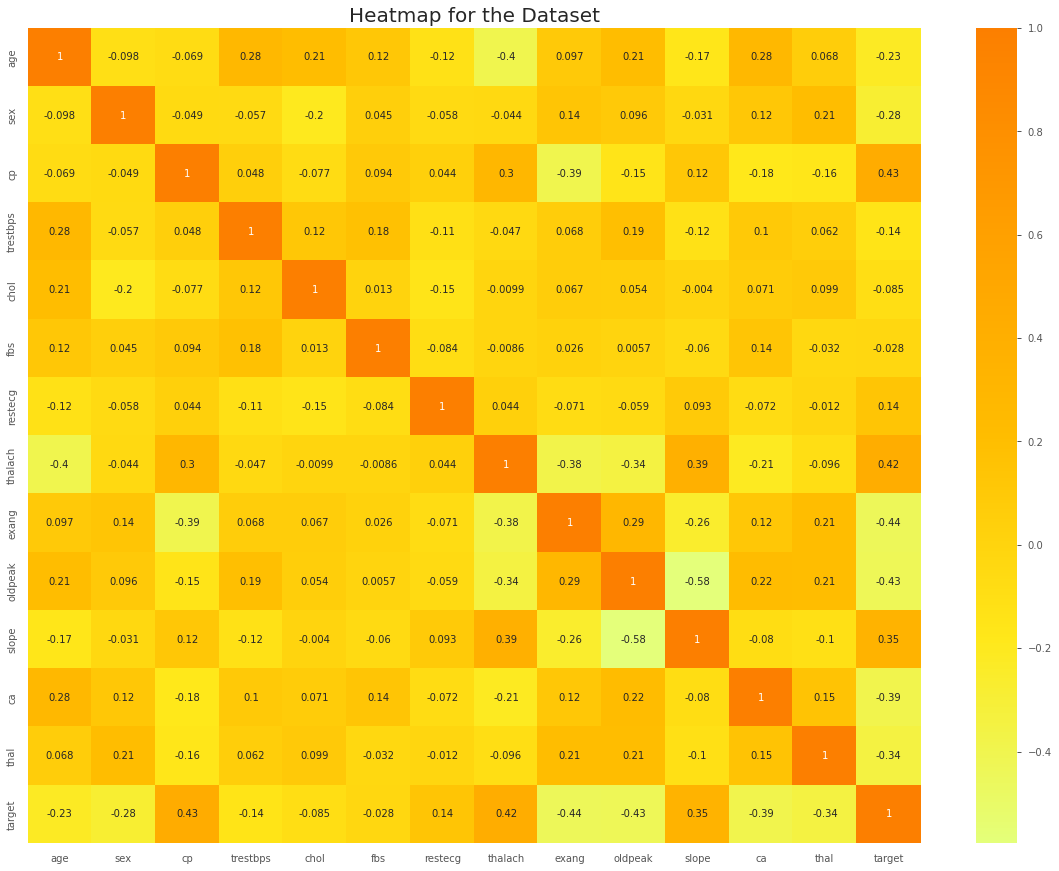

In [18]:
# making a heat map

plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

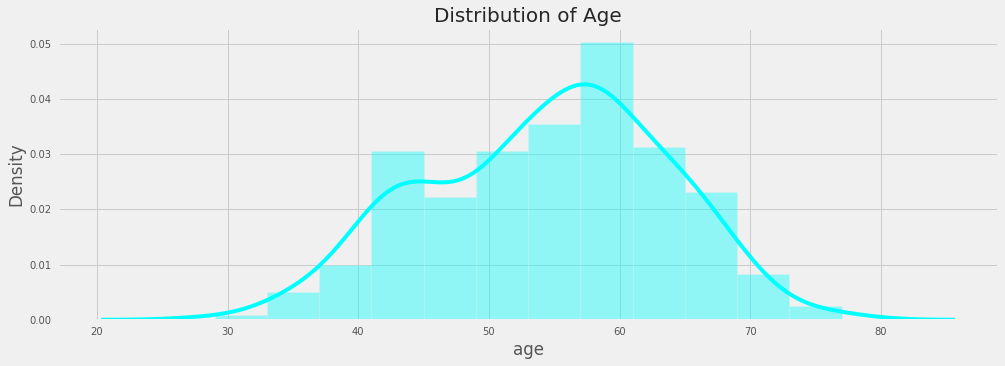

In [19]:
# checking the distribution of age amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

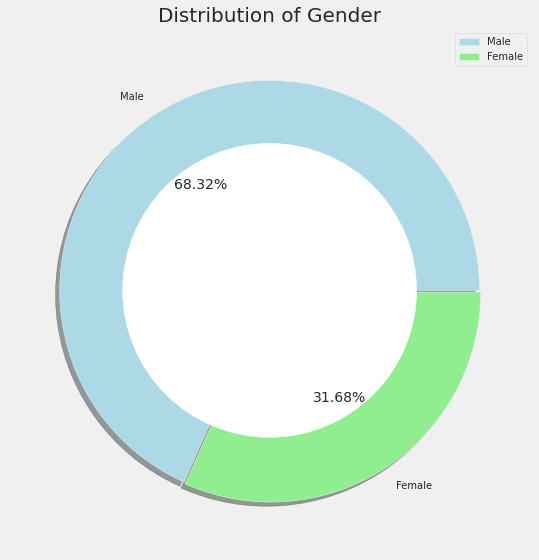

In [20]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

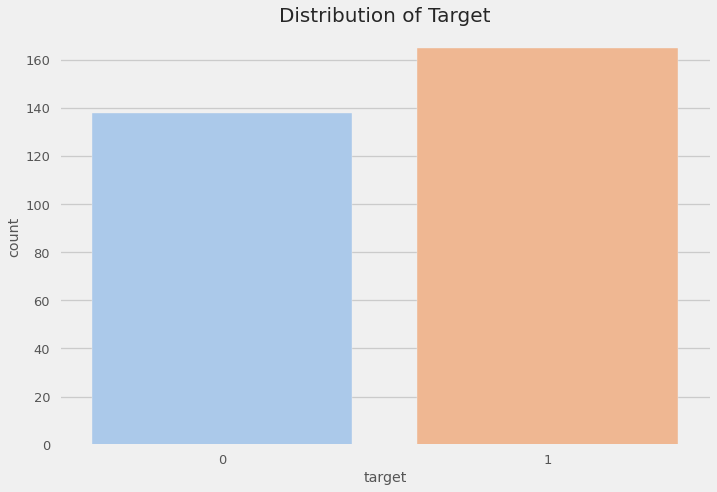

In [21]:
# plotting the target attribute

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

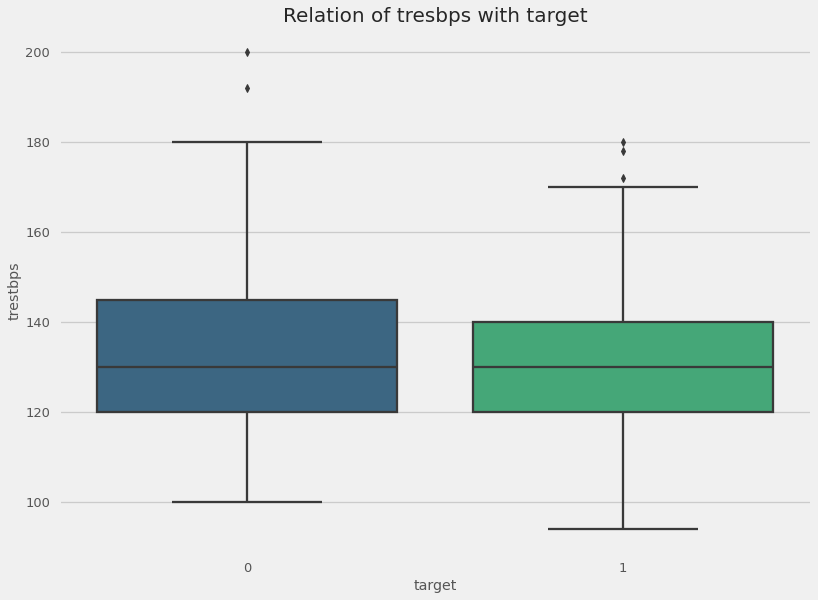

In [22]:
# tresbps vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

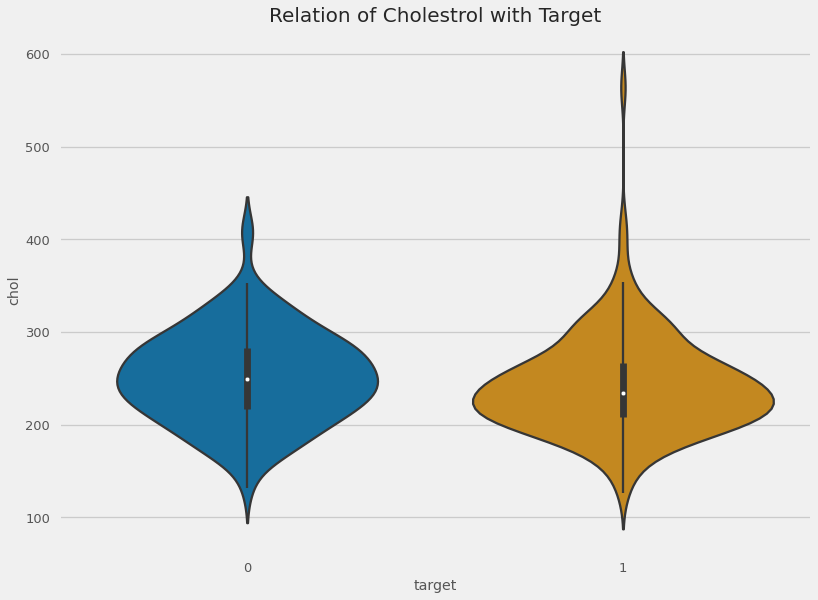

In [23]:

# cholestrol vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

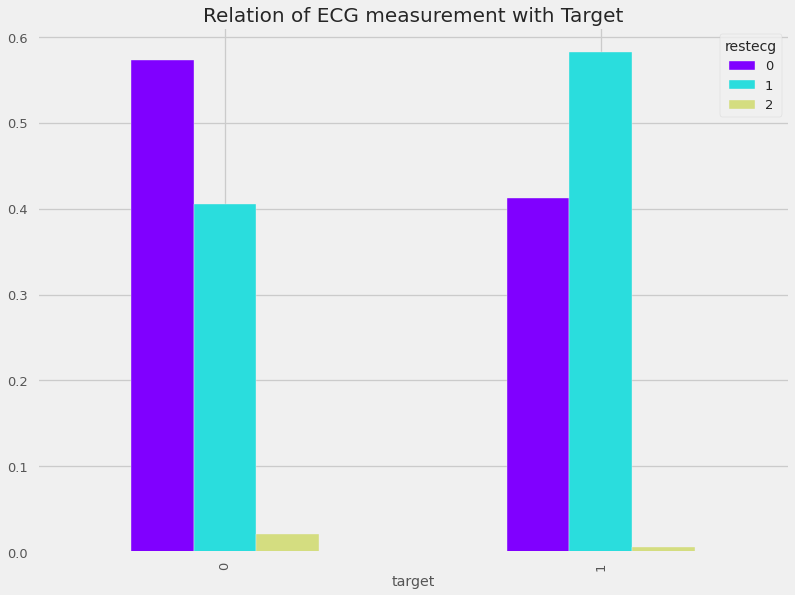

In [24]:
# Resting electrocardiographic measurement vs target
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

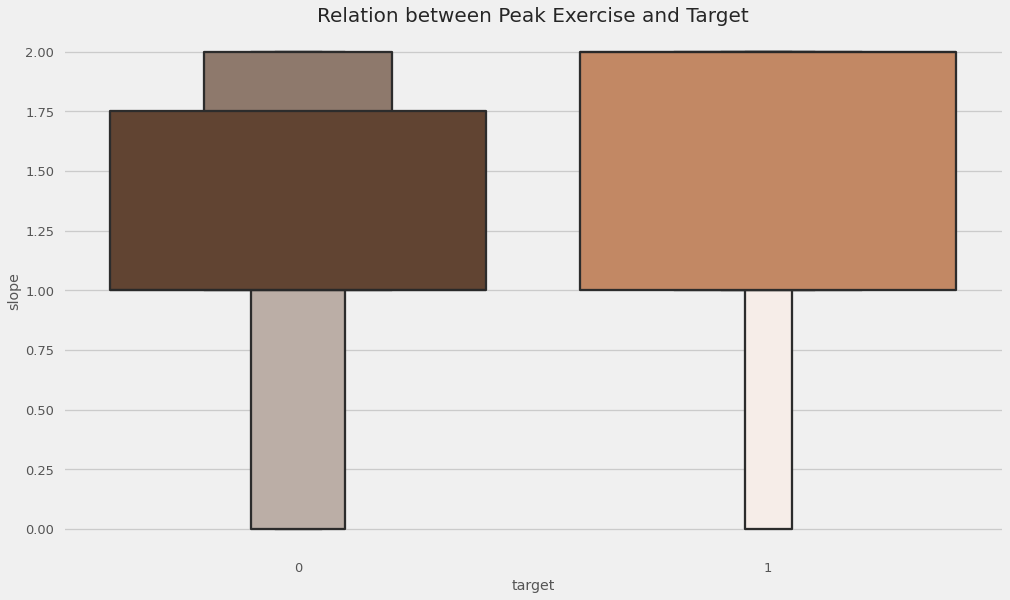

In [25]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(data['target'], data['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

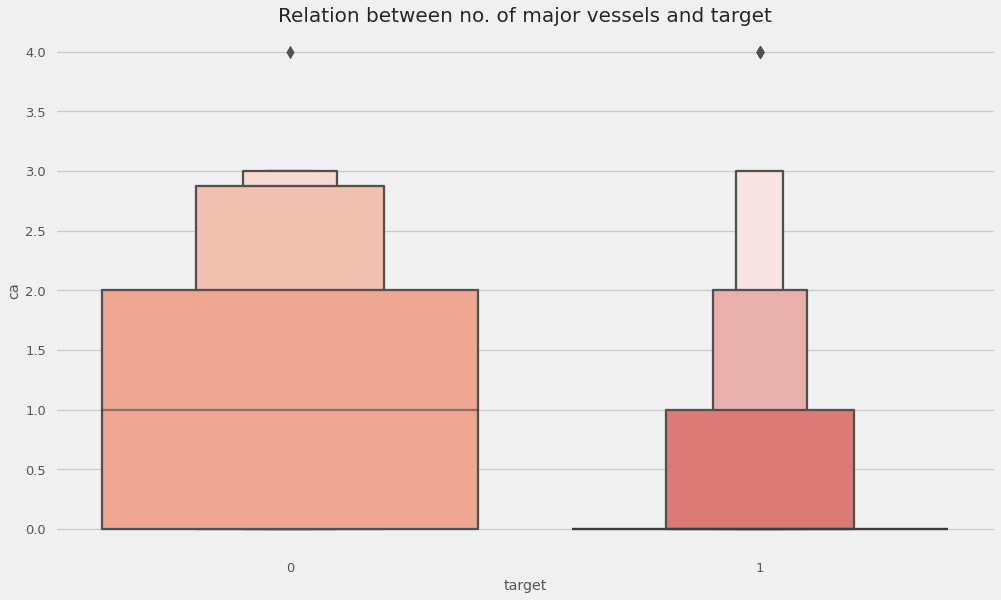

In [26]:
#ca: The number of major vessels (0-3)

sns.boxenplot(data['target'], data['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

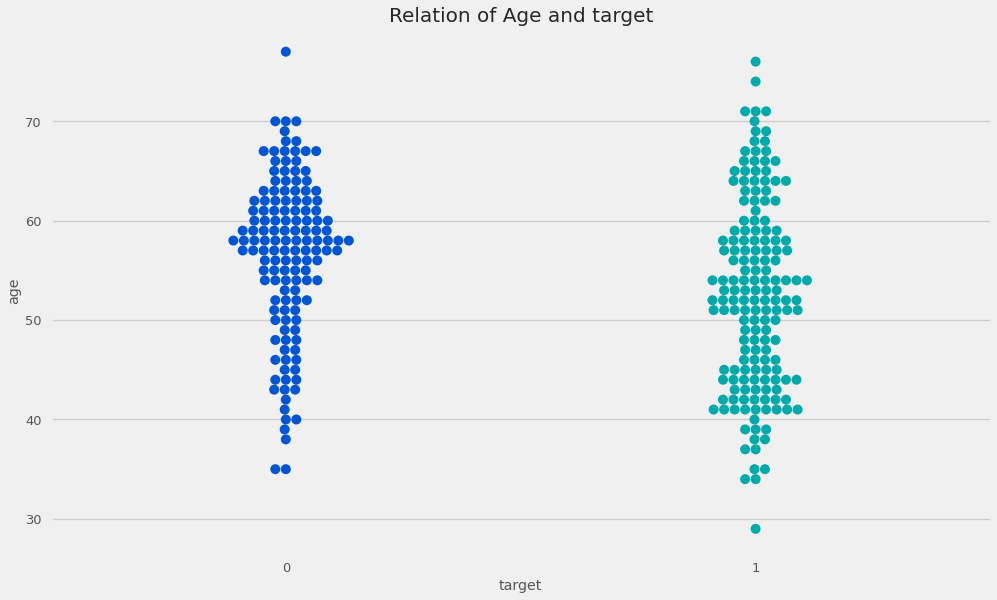

In [27]:

# relation between age and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

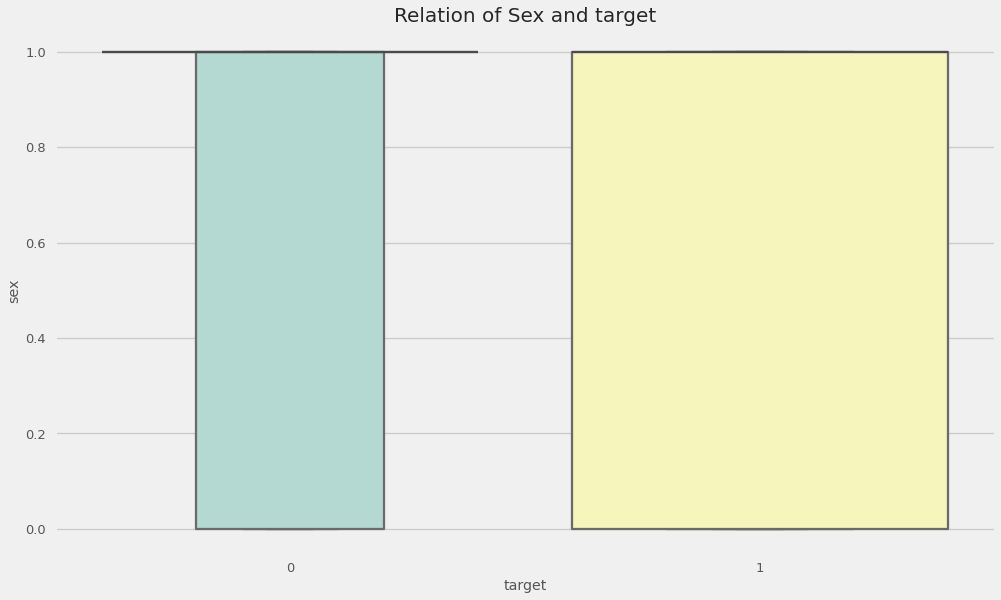

In [28]:
# relation between sex and target

sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

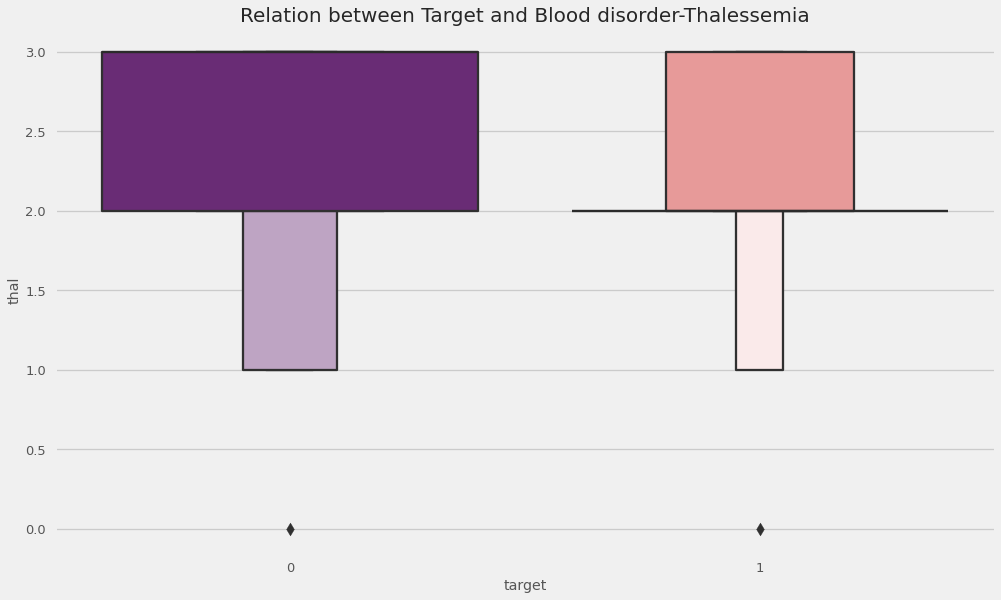

In [29]:

# checking the relation between 
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

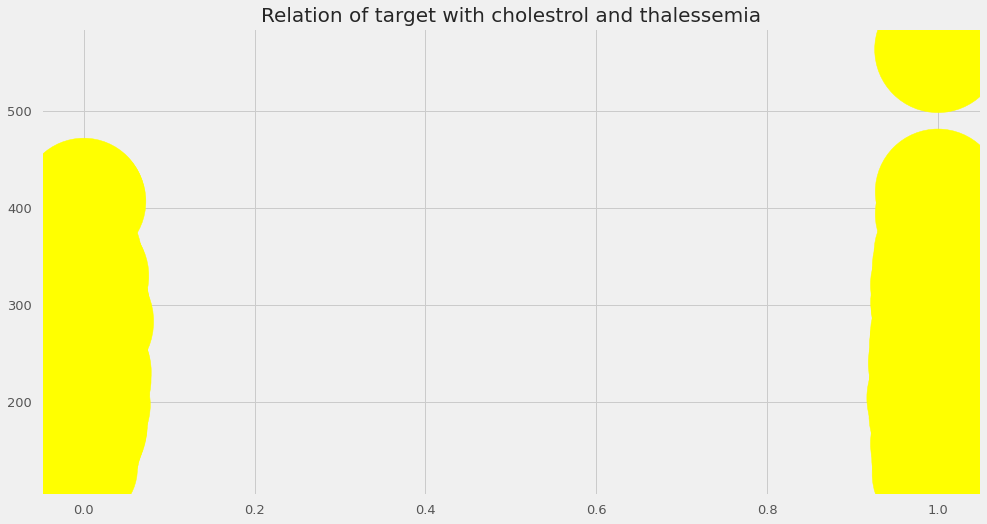

In [30]:
# target vs chol and hue = thalach

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
plt.scatter(x = data['target'], y = data['chol'], s = data['thalach']*100, color = 'yellow')
plt.title('Relation of target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.show()

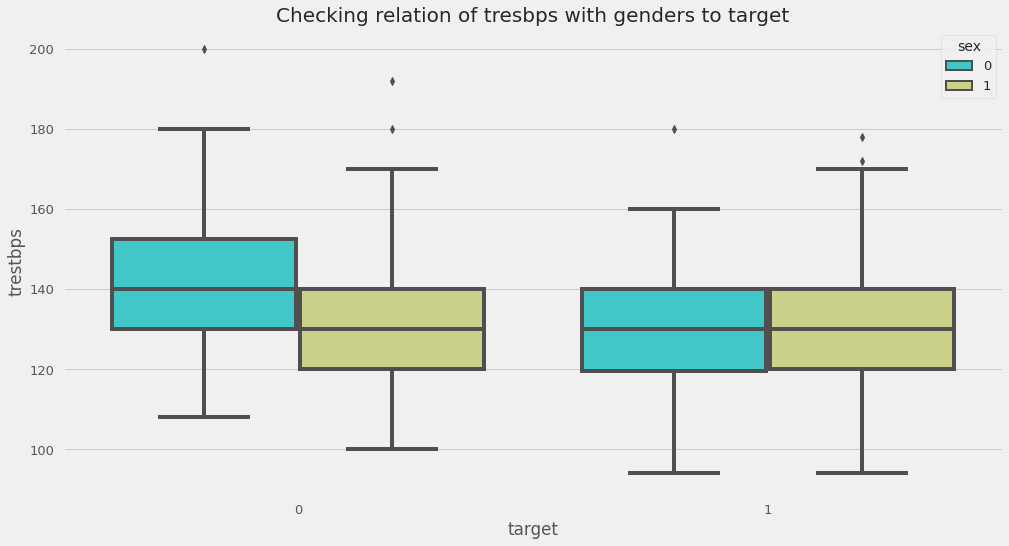

In [31]:
# multi-variate analysis

sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

In [32]:
trace = go.Scatter3d(
    x = data['chol'],
    y = data['trestbps'],
    z = data['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

In [33]:
# let's change the names of the  columns for better understanding

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [34]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [35]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [36]:
# taking the labels out from the data

y = data['target']

data = data.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (303,)


In [37]:
# one hot encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0


data = pd.get_dummies(data, drop_first=True)

In [38]:
# checking the dataset after encoding

data.head()

age  ...  thalassemia_reversable defect
0   63  ...                              0
1   37  ...                              0
2   41  ...                              0
3   56  ...                              0
4   57  ...                              0

[5 rows x 19 columns]

In [39]:
# splitting the dependent and independent variables from the data

x = data

# checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [40]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [41]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


In [43]:
!pip install matplotlib==3.1.3

Training Accuracy : 0.9380165289256198
Testing Accuracy : 0.819672131147541
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



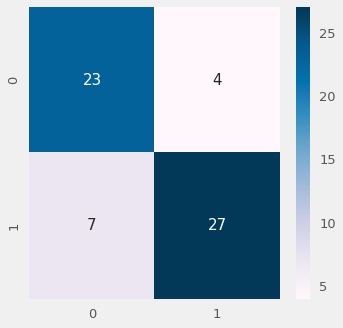

In [44]:
# MODELLING
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

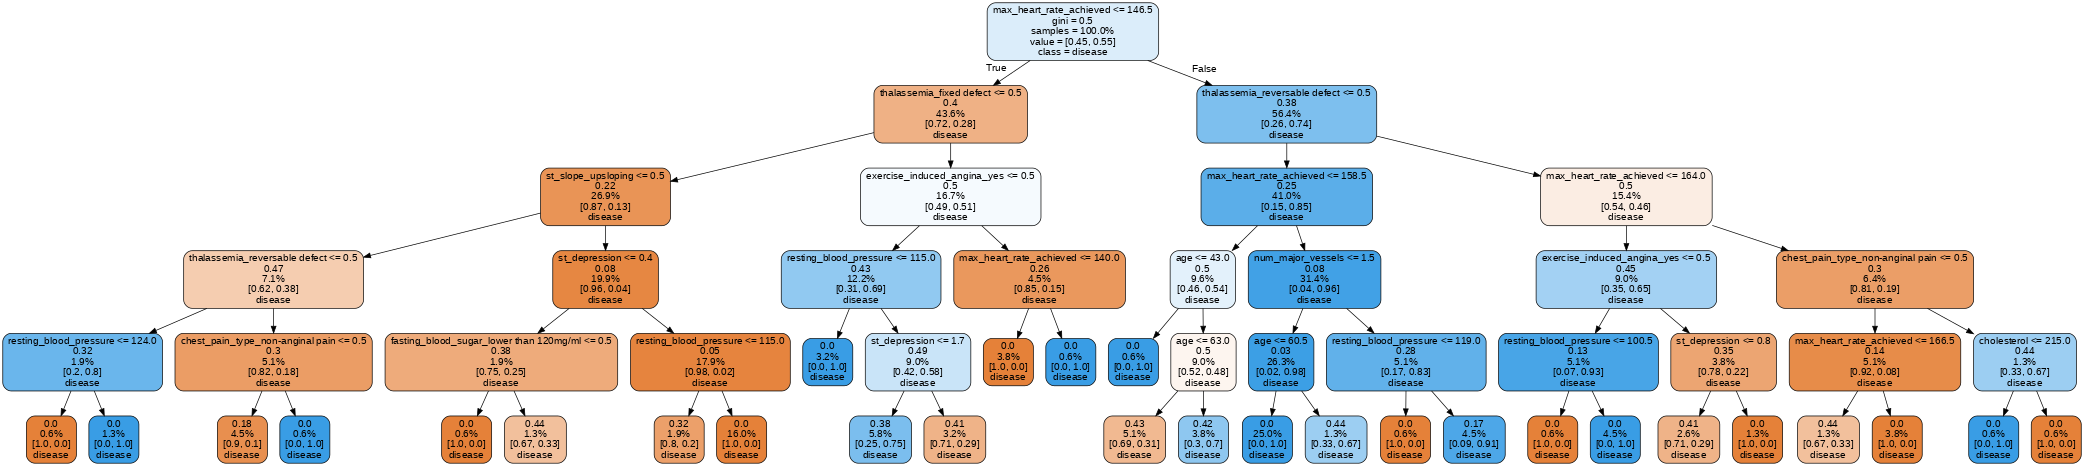

In [45]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

In [46]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7666666666666667
Specificity :  0.8709677419354839


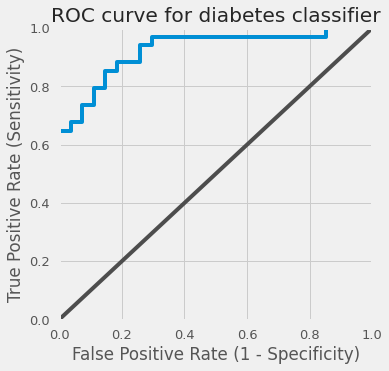

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [48]:
# let's check the auc score

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.9248366013071895


In [49]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.9 MB/s 


In [51]:
!pip install pdpbox

In [52]:
# importing ML Explanability Libraries


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
import shap 
from pdpbox import pdp, info_plots #for partial plots

In [53]:
# let's check the importance of each attributes

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


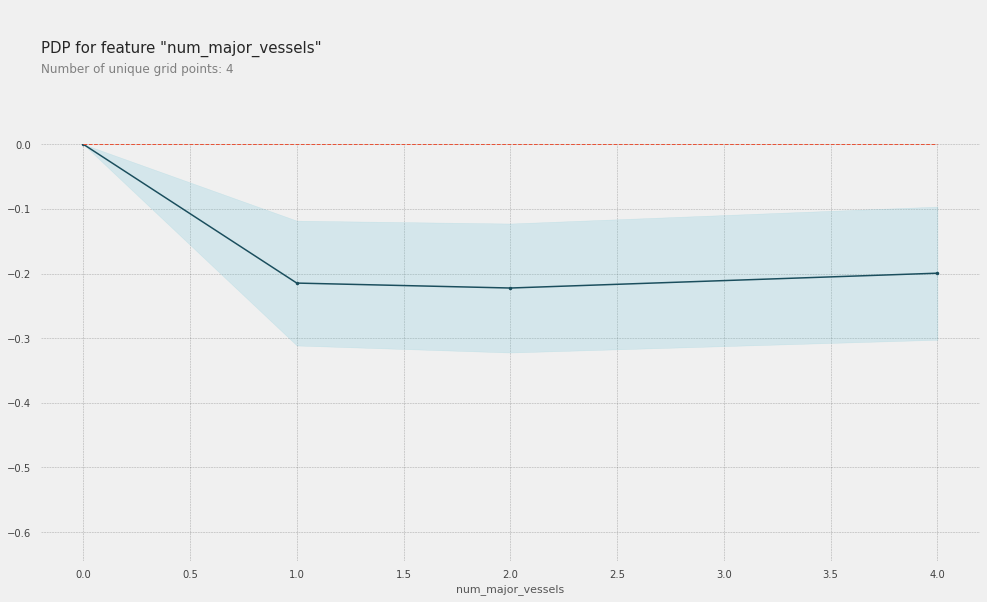

In [54]:
# plotting the partial dependence plot for num_major_vessels

base_features = data.columns.values.tolist()

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

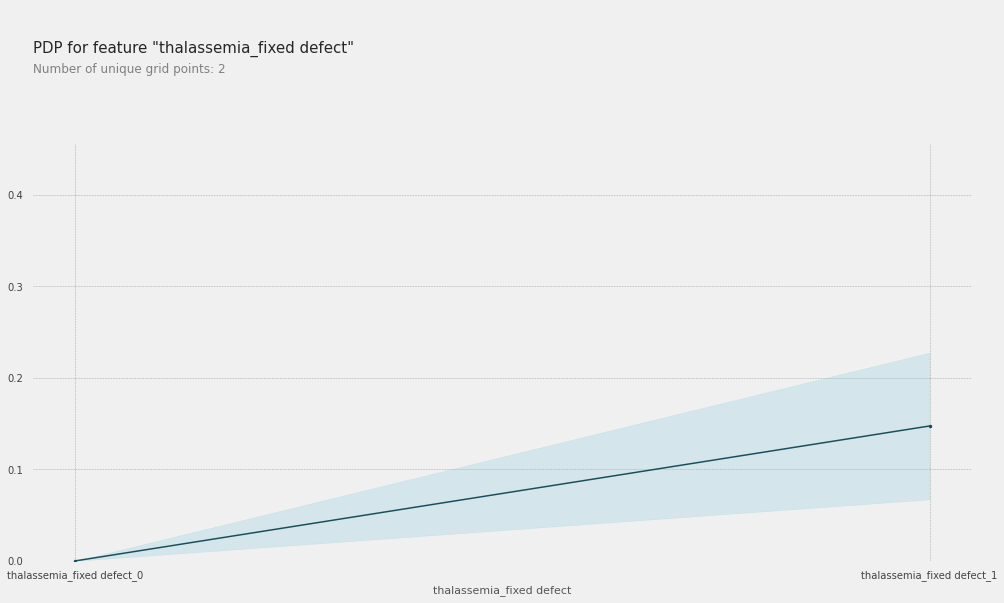

In [55]:

# let's plot the partial dependence plot for thalassemia_fixed defect

base_features = data.columns.values.tolist()

feat_name = 'thalassemia_fixed defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

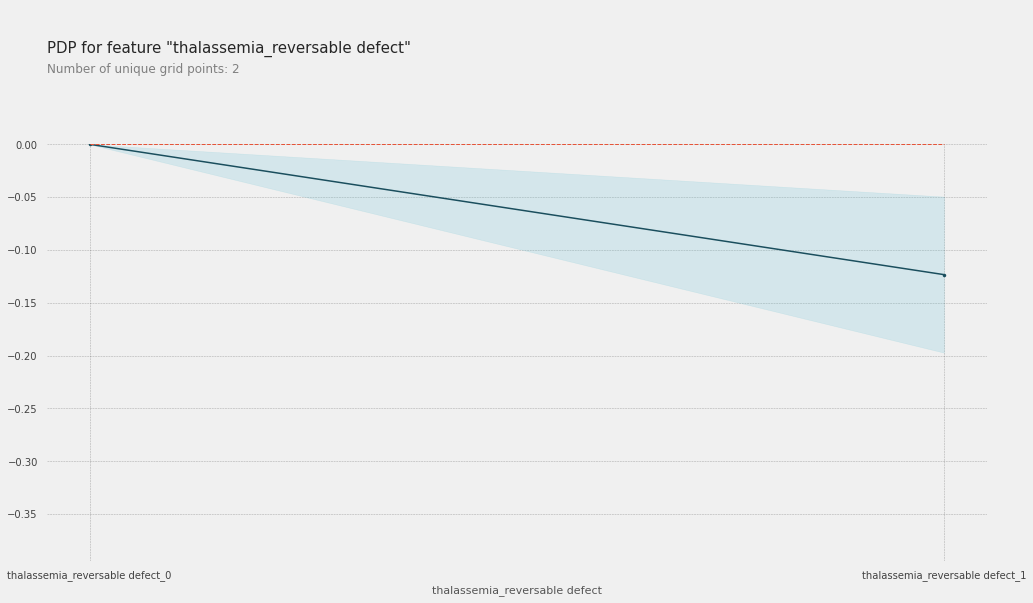

In [56]:

# let's plot the partial dependence plot for thalassemia_reversable defect

base_features = data.columns.values.tolist()

feat_name = 'thalassemia_reversable defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

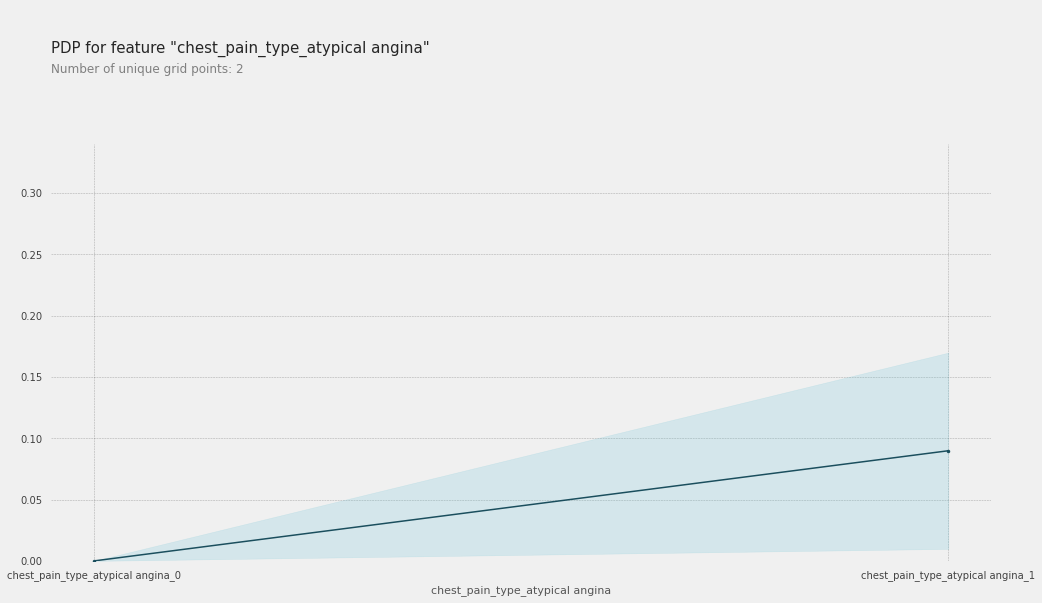

In [57]:
# plotting a partial dependence graph for chest_pain_type_atypical angina

base_features = data.columns.values.tolist()

feat_name = 'chest_pain_type_atypical angina'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

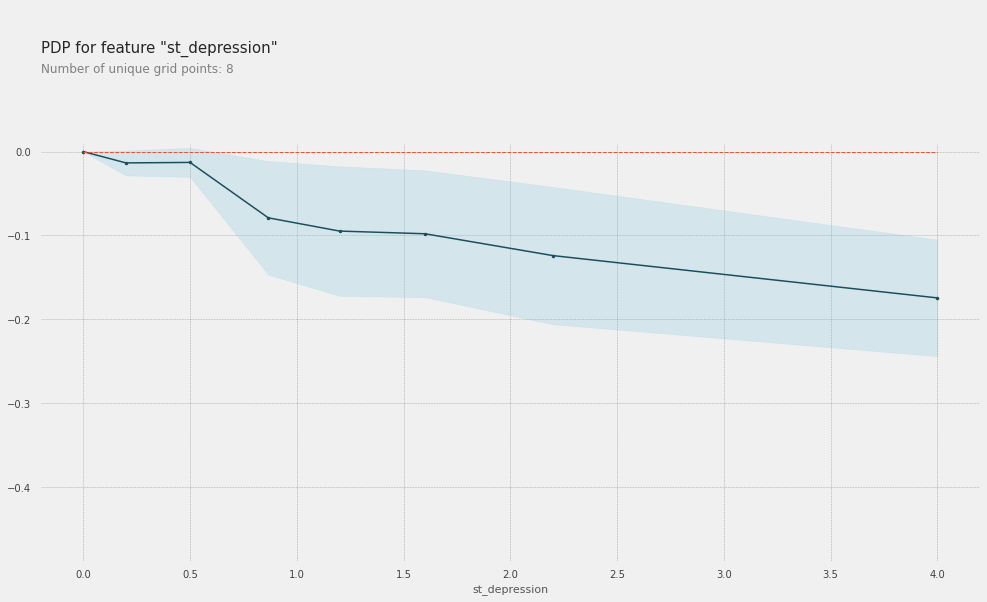

In [58]:
# plotting a partial dependence graph for st_depression


base_features = data.columns.values.tolist()

feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

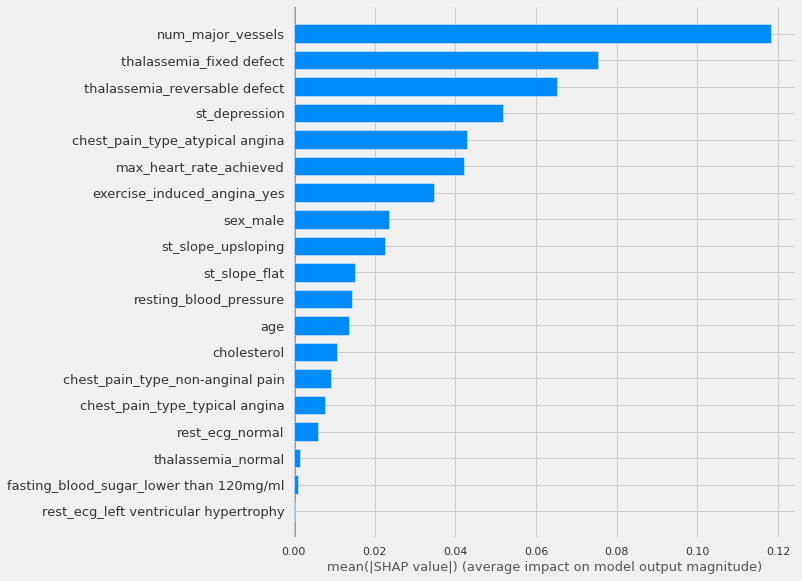

In [59]:
# let's see the shap values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

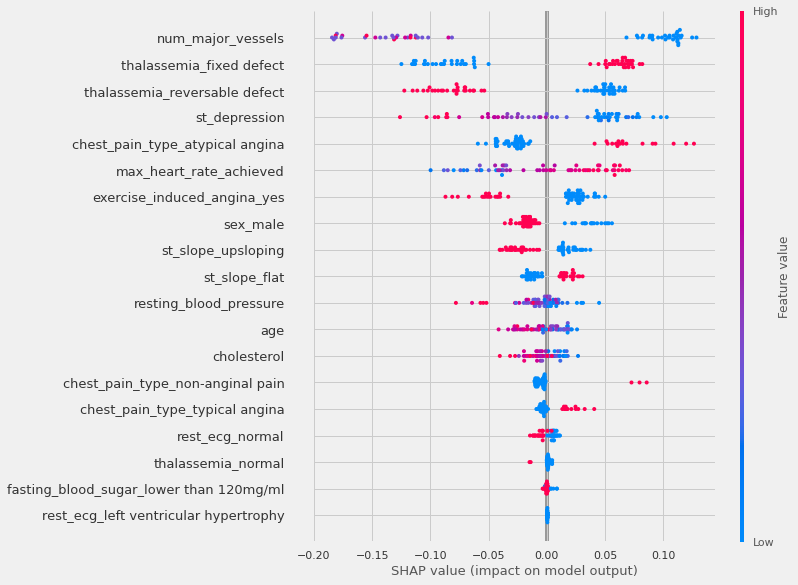

In [60]:
shap.summary_plot(shap_values[1], x_test)

In [61]:
# let's create a function to check the patient's conditions

def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [62]:
# let's do some real time prediction for patients

patients = x_test.iloc[1,:].astype(float)
patient_analysis(model, patients)

In [63]:
patients = x_test.iloc[:, 2].astype(float)
patient_analysis(model, patients)

In [64]:
patients = x_test.iloc[:,3].astype(float)
patient_analysis(model, patients)

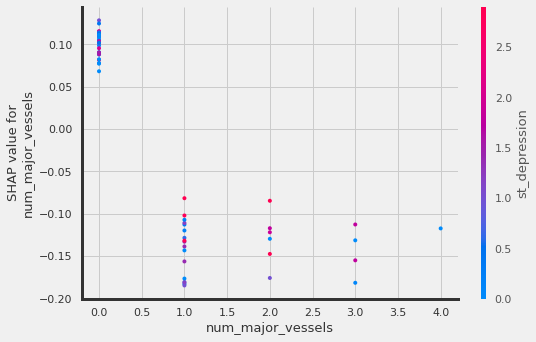

In [65]:
# dependence plot

shap.dependence_plot('num_major_vessels', shap_values[1], x_test, interaction_index = "st_depression")

In [66]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])

---